# Dataset Processing

In [ ]:
import os
import pandas as pd
from ase.io import read
from tqdm import tqdm

# === Step 1: Load Dipole Moment CSVs (skip header row) ===
train_df = pd.read_csv("/Users/na/Hackrush/molecular-property-prediction-challenge/dipole_moments_train.csv", header=None, names=["molecule_name", "dipole_moment"], skiprows=1)
test_df = pd.read_csv("/Users/na/Hackrush/molecular-property-prediction-challenge/dipole_moments_test.csv", header=None, names=["molecule_name", "dipole_moment"], skiprows=1)

print("Train CSV:", train_df.shape)
print("Test CSV:", test_df.shape)


# === Step 2: Function to Parse .xyz Files ===
def load_xyz_data(molecule_names, structure_dir):
    data = []
    for name in tqdm(molecule_names, desc=f"Loading molecules from {structure_dir}"):
        xyz_path = os.path.join(structure_dir, f"{name}.xyz")
        if not os.path.exists(xyz_path):
            print(f"Missing file: {xyz_path}")
            continue
        mol = read(xyz_path)  # ASE reads XYZ file
        data.append({
            'molecule_name': name,
            'atoms': mol,
            'positions': mol.get_positions(),
            'symbols': mol.get_chemical_symbols(),
        })
    return pd.DataFrame(data)


# === Step 3: Load Train and Test Structures ===
train_structures = load_xyz_data(train_df["molecule_name"], "/Users/na/Hackrush/molecular-property-prediction-challenge/structures_train")
test_structures = load_xyz_data(test_df["molecule_name"], "/Users/na/Hackrush/molecular-property-prediction-challenge/structures_test")

print("Loaded train structures:", train_structures.shape)
print("Loaded test structures:", test_structures.shape)


# === Step 4: Merge Structures with CSVs ===
train_full = pd.merge(train_df, train_structures, on='molecule_name', how='inner')
test_full = pd.merge(test_df, test_structures, on='molecule_name', how='inner')

print("Final training set:", train_full.shape)
print("Final test set:", test_full.shape)


# Optional: Preview a row
print(train_full.iloc[0])


Train CSV: (20000, 2)
Test CSV: (5000, 2)


Loading molecules from /Users/na/Hackrush/molecular-property-prediction-challenge/structures_train: 100%|██████████| 20000/20000 [00:05<00:00, 3404.08it/s]
Loading molecules from /Users/na/Hackrush/molecular-property-prediction-challenge/structures_test: 100%|██████████| 5000/5000 [00:01<00:00, 2832.04it/s]

Loaded train structures: (20000, 4)
Loaded test structures: (5000, 4)
Final training set: (20000, 5)
Final test set: (5000, 5)
molecule_name                                                mol_1
dipole_moment                                             2.689132
atoms            (Atom('C', [np.float64(-0.0370745295), np.floa...
positions        [[-0.0370745295, 1.4477350331, 0.109201863], [...
symbols          [C, N, C, C, O, C, O, C, C, H, H, H, H, H, H, ...
Name: 0, dtype: object


In [195]:
train_full

,molecule_name,dipole_moment,atoms,positions,symbols,smiles,3d_descriptor
0,mol_1,2.689132,"(Atom('C', [np.float64(-0.0370745295), np.floa...","[[-0.0370745295, 1.4477350331, 0.109201863], [...","[C, N, C, C, O, C, O, C, C, H, H, H, H, H, H, ...",[H]C1([H])OC([H])([H])C2C([H])([H])NC([H])([H]...,"[73.51669471981023, 27.3775582223545, 18.05221..."
1,mol_2,3.638944,"(Atom('C', [np.float64(-0.103463513), np.float...","[[-0.103463513, -1.1905694516, 0.0399199831], ...","[C, C, C, C, C, O, C, C, N, H, H, H, H, H, H, H]",[H]CCC([H])([H])C([H])([H])C1([H])OC1([H])CN,"[73.51669471981023, 16.007265936071033, 33.568..."
2,mol_3,5.221519,"(Atom('C', [np.float64(0.0158224337), np.float...","[[0.0158224337, 1.5553033782, 0.1920101509], [...","[C, C, C, C, O, C, O, N, H, H, H, H, H, H, H]",[H]C1OC(O)N([H])C1C([H])([H])C([H])([H])[H],"[73.51669471981023, 27.93984518619637, 25.5475..."
3,mol_4,3.876403,"(Atom('C', [np.float64(0.2407700075), np.float...","[[0.2407700075, 1.3465785212, 0.019001486], [-...","[C, N, C, O, C, C, C, C, H, H, H, H, H, H, H, ...",[H]C([H])([H])N1C(O)C2([H])C([H])([H])C12C([H]...,"[73.51669471981023, 23.634295240228404, 39.969..."
4,mol_5,1.138391,"(Atom('C', [np.float64(0.2613937254), np.float...","[[0.2613937254, 1.2768001276, 0.3469361207], [...","[C, C, C, C, O, C, O, H, H, H, H, H, H, H, H]",[H]C(O)C(O)C([H])(C([H])([H])[H])C([H])([H])[H],"[73.51669471981023, 18.527481470525245, 39.670..."
...,...,...,...,...,...,...,...
19995,mol_19996,0.000224,"(Atom('C', [np.float64(-0.0116692517), np.floa...","[[-0.0116692517, 1.4786874537, 0.0201368059], ...","[C, C, N, C, C, N, C, C, N, H, H, H, H, H, H, ...",[H]C([H])([H])C1NC(C([H])([H])[H])NC(C([H])([H...,"[53.3587073998281, 20.67870095093335, 20.67864..."
19996,mol_19997,1.297630,"(Atom('C', [np.float64(-0.0047164737), np.floa...","[[-0.0047164737, 1.4514901867, 0.0132661528], ...","[C, C, O, C, C, C, O, C, C, H, H, H, H, H, H, ...",[H]C1([H])OC2([H])C([H])([H])C23OC([H])([H])C1...,"[73.51669471981023, 18.5957766609747, 34.11585..."
19997,mol_19998,2.566443,"(Atom('C', [np.float64(-0.0988887882), np.floa...","[[-0.0988887882, 1.6143683856, 0.1406152689], ...","[C, C, C, C, O, O, C, N, C, H, H, H, H, H, H, ...",[H]OC([H])([H])C1OC(N([H])[H])C([H])C1C([H])([...,"[73.51669471981023, 20.74950378858095, 24.2005..."
19998,mol_19999,2.811059,"(Atom('O', [np.float64(-0.0167957594), np.floa...","[[-0.0167957594, 1.3193085611, 0.1616436769], ...","[O, N, C, C, C, O, C, N, H, H, H, H, H, H]",[H]NC1OC([H])([H])C([H])([H])C1NO[H],"[73.51669471981023, 15.466915829247952, 15.733..."


### Using 2D Feature Extractors

In [3]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# A simple dictionary for covalent radii in angstroms (for common elements)
covalent_radii = {
    'H': 0.31,
    'C': 0.76,
    'N': 0.71,
    'O': 0.66,
    'F': 0.57,
    'P': 1.07,
    'S': 1.05,
    'Cl': 1.02,
    'Br': 1.20,
    'I': 1.39,
}

def ase_to_rdkit_mol(ase_atoms, scale=1.0, tolerance=0.05):
    """
    Convert an ASE atoms object to an RDKit molecule using distance-based bond detection.
    
    Parameters:
      ase_atoms: ASE atoms object
      scale: scale factor for distances (if needed)
      tolerance: additional tolerance added to bond length threshold
      
    Returns:
      RDKit Mol object, or None if conversion fails.
    """
    try:
        # Create an editable RDKit molecule
        mol = Chem.RWMol()
        atom_indices = []
        
        # Add atoms to the RDKit molecule
        for symbol in ase_atoms.get_chemical_symbols():
            rd_atom = Chem.Atom(symbol)
            idx = mol.AddAtom(rd_atom)
            atom_indices.append(idx)
        
        positions = ase_atoms.get_positions() * scale  # scale positions if necessary
        num_atoms = len(positions)
        
        # Add bonds based on distance criteria
        for i in range(num_atoms):
            for j in range(i+1, num_atoms):
                pos_i = positions[i]
                pos_j = positions[j]
                distance = np.linalg.norm(pos_i - pos_j)
                symbol_i = ase_atoms.get_chemical_symbols()[i]
                symbol_j = ase_atoms.get_chemical_symbols()[j]
                # Get covalent radii; if not found, use a default value (e.g., 0.7)
                r_i = covalent_radii.get(symbol_i, 0.7)
                r_j = covalent_radii.get(symbol_j, 0.7)
                # If the distance is less than the sum of covalent radii plus a tolerance, add a bond
                if distance <= (r_i + r_j + tolerance):
                    try:
                        mol.AddBond(i, j, order=Chem.rdchem.BondType.SINGLE)
                    except Exception as e:
                        print(f"Bond addition error between atoms {i} and {j}: {e}")
        
        # Sanitize the molecule to update valences and connectivity
        Chem.SanitizeMol(mol)
        return mol
    except Exception as e:
        print(f"Conversion error: {e}")
        return None

def ase_to_smiles(ase_atoms):
    """Convert an ASE atoms object to a SMILES string."""
    rdkit_mol = ase_to_rdkit_mol(ase_atoms)
    if rdkit_mol is None:
        return None
    # Generate a SMILES string
    smiles = Chem.MolToSmiles(rdkit_mol)
    return smiles

# Example: Creating a SMILES column for the training dataset
train_full["smiles"] = train_full["atoms"].apply(ase_to_smiles)
test_full["smiles"] = test_full["atoms"].apply(ase_to_smiles)

# Preview the first few SMILES strings
print(train_full[["molecule_name", "smiles"]].head())

[03:49:55] Explicit valence for atom # 6 N, 4, is greater than permitted


Conversion error: Explicit valence for atom # 6 N, 4, is greater than permitted


[03:50:02] Explicit valence for atom # 8 N, 4, is greater than permitted


Conversion error: Explicit valence for atom # 8 N, 4, is greater than permitted
  molecule_name                                             smiles
0         mol_1  [H]C1([H])OC([H])([H])C2C([H])([H])NC([H])([H]...
1         mol_2       [H]CCC([H])([H])C([H])([H])C1([H])OC1([H])CN
2         mol_3        [H]C1OC(O)N([H])C1C([H])([H])C([H])([H])[H]
3         mol_4  [H]C([H])([H])N1C(O)C2([H])C([H])([H])C12C([H]...
4         mol_5    [H]C(O)C(O)C([H])(C([H])([H])[H])C([H])([H])[H]


SMILES: [H]CCC([H])([H])C([H])([H])C1([H])OC1([H])CN


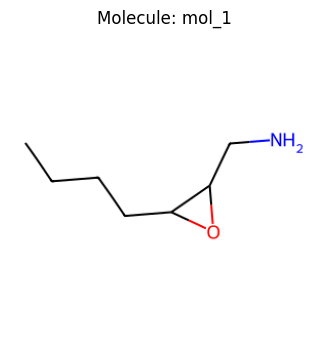

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Get the SMILES for the first molecule in the training set
mol_smiles = train_full["smiles"].iloc[1]
print("SMILES:", mol_smiles)

# Convert SMILES back to an RDKit molecule
mol = Chem.MolFromSmiles(mol_smiles)
if mol is None:
    print("Error converting SMILES to RDKit Mol.")
else:
    # Generate an image of the molecule
    img = Draw.MolToImage(mol, size=(300, 300))
    
    # Display using matplotlib
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Molecule: {train_full['molecule_name'].iloc[0]}")
    plt.show()

In [6]:
from rdkit import Chem
from torch_geometric.data import Data
import torch

def mol_to_graph(mol):
    # Node features: atomic number
    atom_features = []
    for atom in mol.GetAtoms():
        atom_features.append([atom.GetAtomicNum()])
    x = torch.tensor(atom_features, dtype=torch.float)

    # Edges: bond connections
    edge_index = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_index.append([i, j])
        edge_index.append([j, i])  # Undirected

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

    return Data(x=x, edge_index=edge_index)

# Example usage
mol_smiles = "CCO"  # Example SMILES
mol = Chem.MolFromSmiles(mol_smiles)
data = mol_to_graph(mol)
print(data)


Data(x=[3, 1], edge_index=[2, 4])


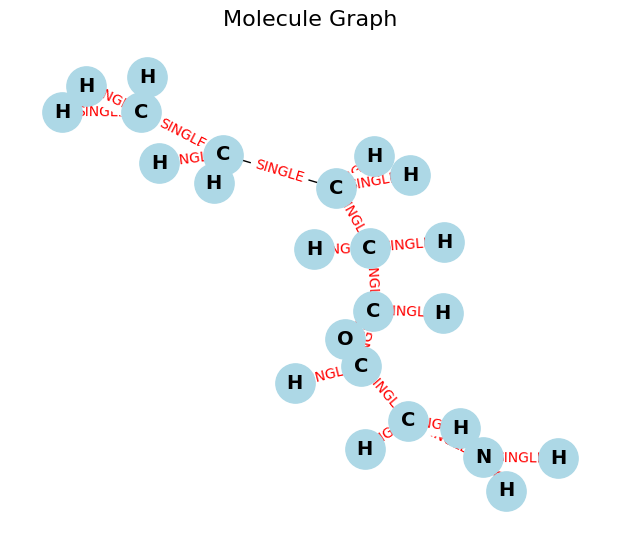

In [12]:
from rdkit import Chem
import networkx as nx
import matplotlib.pyplot as plt

def mol_to_nx(mol):
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), label=atom.GetSymbol())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond_type=str(bond.GetBondType()))
    return G

def plot_molecule_graph(G):
    pos = nx.spring_layout(G)  # Layout for visualization
    labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'bond_type')

    plt.figure(figsize=(6, 5))
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=800, font_size=14, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title("Molecule Graph", fontsize=16)
    plt.axis('off')
    plt.show()

# Example
mol_smiles = "[H]CCC([H])([H])C([H])([H])C1([H])OC1([H])CN"
mol = Chem.MolFromSmiles(mol_smiles)
mol = Chem.AddHs(mol)
G = mol_to_nx(mol)
plot_molecule_graph(G)


### Using 3D Feature Extractors

In [19]:
train_full_ = train_full
test_full_ = test_full

In [20]:
from dscribe.descriptors import CoulombMatrix, SOAP
from ase import Atoms
import numpy as np

# Define the elements present in your dataset
all_elements = list(set([element for sublist in train_full['symbols'] for element in sublist]))
print("Unique elements in dataset:", all_elements)

# === Coulomb Matrix Descriptor ===
coulomb = CoulombMatrix(n_atoms_max=30, permutation='sorted_l2')

# === SOAP Descriptor ===
soap = SOAP(
    species=all_elements,
    periodic=False,
    r_cut=5.0,
    n_max=8,
    l_max=6,
    sparse=False
)

# === Helper to get descriptors ===
def get_3d_descriptors(mol):
    try:
        cm = coulomb.create(mol, n_jobs=1)
        soap_vec = soap.create(mol, n_jobs=1)
        return np.concatenate([cm, soap_vec.mean(axis=0)])  # avg SOAP over atoms
    except Exception as e:
        print("Descriptor error:", e)
        return np.zeros(coulomb.get_number_of_features() + soap.get_number_of_features())

# Apply to dataset
from tqdm import tqdm
tqdm.pandas()

train_full_['3d_descriptor'] = train_full['atoms'].progress_apply(get_3d_descriptors)
test_full_['3d_descriptor'] = test_full['atoms'].progress_apply(get_3d_descriptors)

Unique elements in dataset: ['O', 'H', 'F', 'C', 'N']


100%|██████████| 5000/5000 [00:03<00:00, 1521.63it/s]


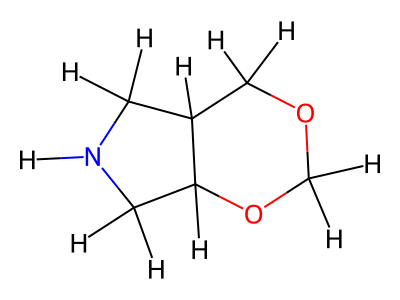

Molecule 0 | Atoms: 18


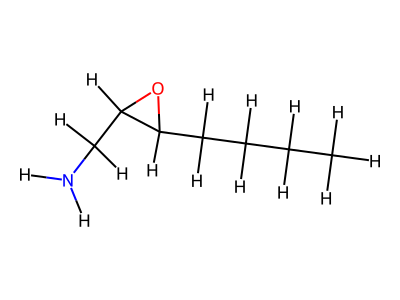

Molecule 1 | Atoms: 16


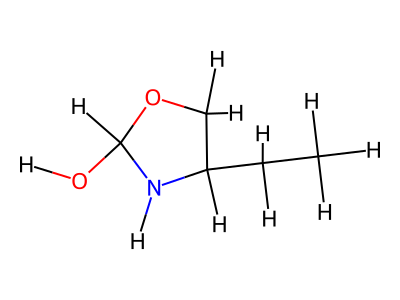

Molecule 2 | Atoms: 15


In [22]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

def visualize_molecule(ase_atoms, idx=0):
    """Visualize a molecule from the dataset using RDKit."""
    # Convert ASE Atoms to RDKit Mol using your existing function
    mol = ase_to_rdkit_mol(ase_atoms)
    
    if mol:
        try:
            # Add hydrogens for better visualization
            mol = Chem.AddHs(mol)
            img = Draw.MolToImage(mol, size=(400, 300))
            display(img)
            print(f"Molecule {idx} | Atoms: {len(ase_atoms)}")
        except Exception as e:
            print(f"Visualization error for molecule {idx}: {e}")
    else:
        print(f"Failed to convert molecule {idx} to RDKit format")

# Visualize first 3 molecules in the dataset
for i in range(3):
    visualize_molecule(train_full_['atoms'].iloc[i], idx=i)

# Base Graph Neural Network Based Implementation

### Generating Actual Graphs

In [67]:
descriptor_2d_graph = []
descriptor_3d_graph = []

In [ ]:
def graph_3d(ase_atoms, idx=0):
    """Visualize a molecule from the dataset using RDKit."""
    # Convert ASE Atoms to RDKit Mol using your existing function
    mol = ase_to_rdkit_mol(ase_atoms)
    
    if mol:
        try:
            mol = Chem.AddHs(mol)
            G = mol_to_nx(mol=mol)
            return G
        except Exception as e:
            print(f"Visualization error for molecule {idx}: {e}")
    else:
        print(f"Failed to convert molecule {idx} to RDKit format")
        return None
        

# Visualize first 3 molecules in the dataset
for i in range(len(train_full)):
    descriptor_3d_graph.append(graph_3d(train_full_['atoms'].iloc[i], idx=i))

[04:56:07] Explicit valence for atom # 6 N, 4, is greater than permitted


Conversion error: Explicit valence for atom # 6 N, 4, is greater than permitted
Failed to convert molecule 5071 to RDKit format


[04:56:15] Explicit valence for atom # 8 N, 4, is greater than permitted


Conversion error: Explicit valence for atom # 8 N, 4, is greater than permitted
Failed to convert molecule 15658 to RDKit format


In [ ]:
# Visualize first 3 molecules in the dataset
for i in range(len(train_full)):
    try:
        mol = Chem.MolFromSmiles(train_full_['smiles'].iloc[i])
        mol = Chem.AddHs(mol)
        G = mol_to_nx(mol)
        descriptor_2d_graph.append(G)
    except:
        print(i)
        print(train_full_['smiles'].iloc[i])

[04:56:18] WARNING: not removing hydrogen atom without neighbors
[04:56:18] WARNING: not removing hydrogen atom without neighbors
[04:56:19] WARNING: not removing hydrogen atom without neighbors
[04:56:19] WARNING: not removing hydrogen atom without neighbors


5071
None


[04:56:19] WARNING: not removing hydrogen atom without neighbors
[04:56:19] WARNING: not removing hydrogen atom without neighbors
[04:56:19] WARNING: not removing hydrogen atom without neighbors


15658
None


In [74]:
descriptor_3d_graph.pop(5071)
descriptor_3d_graph.pop(15658)

In [166]:
import torch
from torch_geometric.data import Data

# Raw adjacency list input
adjacency_list = [
    (0, {1: {'bond_type': 'SINGLE'}, 8: {'bond_type': 'SINGLE'}, 9: {'bond_type': 'SINGLE'}, 10: {'bond_type': 'SINGLE'}}),
    (1, {0: {'bond_type': 'SINGLE'}, 2: {'bond_type': 'SINGLE'}}),
    (2, {1: {'bond_type': 'SINGLE'}, 3: {'bond_type': 'SINGLE'}, 11: {'bond_type': 'SINGLE'}, 12: {'bond_type': 'SINGLE'}}),
    (3, {2: {'bond_type': 'SINGLE'}, 4: {'bond_type': 'SINGLE'}, 7: {'bond_type': 'SINGLE'}, 13: {'bond_type': 'SINGLE'}}),
    (4, {3: {'bond_type': 'SINGLE'}, 5: {'bond_type': 'SINGLE'}, 14: {'bond_type': 'SINGLE'}, 15: {'bond_type': 'SINGLE'}}),
    (5, {4: {'bond_type': 'SINGLE'}, 6: {'bond_type': 'SINGLE'}, 16: {'bond_type': 'SINGLE'}}),
    (15, {4: {'bond_type': 'SINGLE'}}),
    (16, {5: {'bond_type': 'SINGLE'}}),
    (17, {6: {'bond_type': 'SINGLE'}}),
    (18, {6: {'bond_type': 'SINGLE'}}),
    (19, {7: {'bond_type': 'SINGLE'}})
]

# Extract edges and bond features
edges = []
bond_features = []
for node, neighbors in adjacency_list:
    for neighbor, attrs in neighbors.items():
        edges.append([node, neighbor])
        # Convert bond type to numerical feature
        bond_features.append([1.0 if attrs['bond_type'] == 'SINGLE' else 0.0])

# Convert to tensors
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
edge_attr = torch.tensor(bond_features, dtype=torch.float)

# Create node features (example: atomic numbers)
num_nodes = edge_index.max().item() + 1
x = torch.full((num_nodes, 1), 6.0)  # Default to carbon (atomic number 6)

# Create PyG Data object with dummy dipole target
data = Data(
    x=x,
    edge_index=edge_index,
    edge_attr=edge_attr,
    y=torch.rand(3)  # Replace with actual dipole moment vector
)

print(data)


Data(x=[20, 1], edge_index=[2, 26], edge_attr=[26, 1], y=[3])


In [169]:
adjacency_list = list(descriptor_2d_graph[0].adjacency())

In [189]:
adjacency_list_2d = []
for i in descriptor_2d_graph:
    try:
        adjacency_list_2d.append(list(i.adjacency()))
    except:
        print(i)


adjacency_list_3d = []
for i in descriptor_3d_graph:
    try:
        adjacency_list_3d.append(list(i.adjacency()))
    except:
        print(i)

None


In [186]:
list(descriptor_2d_graph[0].adjacency())

[(0,
  {1: {'bond_type': 'SINGLE'},
   8: {'bond_type': 'SINGLE'},
   9: {'bond_type': 'SINGLE'},
   10: {'bond_type': 'SINGLE'}}),
 (1, {0: {'bond_type': 'SINGLE'}, 2: {'bond_type': 'SINGLE'}}),
 (2,
  {1: {'bond_type': 'SINGLE'},
   3: {'bond_type': 'SINGLE'},
   11: {'bond_type': 'SINGLE'},
   12: {'bond_type': 'SINGLE'}}),
 (3,
  {2: {'bond_type': 'SINGLE'},
   4: {'bond_type': 'SINGLE'},
   7: {'bond_type': 'SINGLE'},
   13: {'bond_type': 'SINGLE'}}),
 (4,
  {3: {'bond_type': 'SINGLE'},
   5: {'bond_type': 'SINGLE'},
   14: {'bond_type': 'SINGLE'},
   15: {'bond_type': 'SINGLE'}}),
 (5,
  {4: {'bond_type': 'SINGLE'},
   6: {'bond_type': 'SINGLE'},
   16: {'bond_type': 'SINGLE'}}),
 (6,
  {5: {'bond_type': 'SINGLE'},
   7: {'bond_type': 'SINGLE'},
   17: {'bond_type': 'SINGLE'},
   18: {'bond_type': 'SINGLE'}}),
 (7,
  {6: {'bond_type': 'SINGLE'},
   8: {'bond_type': 'SINGLE'},
   3: {'bond_type': 'SINGLE'},
   19: {'bond_type': 'SINGLE'}}),
 (8, {7: {'bond_type': 'SINGLE'}, 0: {'b

In [180]:
len(dipoles)

19998

In [187]:
list(descriptor_3d_graph[0].adjacency())

[(0,
  {1: {'bond_type': 'SINGLE'},
   8: {'bond_type': 'SINGLE'},
   9: {'bond_type': 'SINGLE'},
   10: {'bond_type': 'SINGLE'}}),
 (1,
  {0: {'bond_type': 'SINGLE'},
   2: {'bond_type': 'SINGLE'},
   18: {'bond_type': 'SINGLE'}}),
 (2,
  {1: {'bond_type': 'SINGLE'},
   3: {'bond_type': 'SINGLE'},
   11: {'bond_type': 'SINGLE'},
   12: {'bond_type': 'SINGLE'}}),
 (3,
  {2: {'bond_type': 'SINGLE'},
   4: {'bond_type': 'SINGLE'},
   8: {'bond_type': 'SINGLE'},
   13: {'bond_type': 'SINGLE'}}),
 (4, {3: {'bond_type': 'SINGLE'}, 5: {'bond_type': 'SINGLE'}}),
 (5,
  {4: {'bond_type': 'SINGLE'},
   6: {'bond_type': 'SINGLE'},
   14: {'bond_type': 'SINGLE'},
   15: {'bond_type': 'SINGLE'}}),
 (6, {5: {'bond_type': 'SINGLE'}, 7: {'bond_type': 'SINGLE'}}),
 (7,
  {6: {'bond_type': 'SINGLE'},
   8: {'bond_type': 'SINGLE'},
   16: {'bond_type': 'SINGLE'},
   17: {'bond_type': 'SINGLE'}}),
 (8,
  {0: {'bond_type': 'SINGLE'},
   3: {'bond_type': 'SINGLE'},
   7: {'bond_type': 'SINGLE'},
   19: {'b

### GNN Implementation

In [ ]:
# First install required packages
# !pip install torch torch_geometric

import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GINEConv, global_add_pool
import torch.nn.functional as F

# Data preparation function (fixed)
def create_pyg_data(adjacency_list, dipole_moment):
    edges = []
    bond_features = []
    
    # Find all nodes present in the adjacency list
    all_nodes = set()
    for node, neighbors in adjacency_list:
        all_nodes.add(node)
        all_nodes.update(neighbors.keys())
    
    max_node = max(all_nodes) if all_nodes else 0
    
    # Process edges
    for node, neighbors in adjacency_list:
        for neighbor, attrs in neighbors.items():
            edges.append([node, neighbor])
            bond_features.append([1.0])  # SINGLE=1.0

    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous() if edges else torch.empty((2, 0), dtype=torch.long)
    edge_attr = torch.tensor(bond_features, dtype=torch.float) if bond_features else torch.empty((0, 1), dtype=torch.float)
    
    # Create node features (atomic numbers)
    x = torch.full((max_node + 1, 1), 6.0)  # Default to carbon
    
    return Data(
        x=x,
        edge_index=edge_index,
        edge_attr=edge_attr,
        y=torch.tensor([dipole_moment], dtype=torch.float)
    )

adjacency_lists = adjacency_list_2d

dipole_moments = dipoles

# Create dataset
dataset = [create_pyg_data(adj, dipole) for adj, dipole in zip(adjacency_lists, dipole_moments)]
loader = DataLoader(dataset, batch_size=2, shuffle=True)

# Model definition (updated for batch processing)
class DipolePredictor(torch.nn.Module):
    def __init__(self, node_dim=1, edge_dim=1, hidden_dim=64):
        super().__init__()
        self.node_enc = torch.nn.Linear(node_dim, hidden_dim)
        self.edge_enc = torch.nn.Linear(edge_dim, hidden_dim)
        
        self.conv1 = GINEConv(nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        ), edge_dim=hidden_dim)
        
        self.conv2 = GINEConv(nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        ), edge_dim=hidden_dim)
        
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Linear(hidden_dim//2, 1)
        )

    def forward(self, data):
        x = F.relu(self.node_enc(data.x))
        edge_attr = F.relu(self.edge_enc(data.edge_attr))
        
        x = self.conv1(x, data.edge_index, edge_attr)
        x = F.relu(x)
        x = self.conv2(x, data.edge_index, edge_attr)
        
        x = global_add_pool(x, data.batch)
        return self.fc(x).squeeze()


In [194]:

# Training setup
model = DipolePredictor()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
loss_fn = torch.nn.MSELoss()

# Training loop with batch processing
for epoch in range(100):
    total_loss = 0
    for batch in loader:
        optimizer.zero_grad()
        pred = model(batch)
        loss = loss_fn(pred, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Average Loss: {total_loss/len(loader):.4f}")



Epoch 1, Average Loss: 2.6820
Epoch 2, Average Loss: 2.6413
Epoch 3, Average Loss: 2.6054
Epoch 4, Average Loss: 2.5734
Epoch 5, Average Loss: 2.5374
Epoch 6, Average Loss: 2.4973
Epoch 7, Average Loss: 2.4516
Epoch 8, Average Loss: 2.3849
Epoch 9, Average Loss: 2.3216
Epoch 10, Average Loss: 2.2639
Epoch 11, Average Loss: 2.2222
Epoch 12, Average Loss: 2.1677
Epoch 13, Average Loss: 2.1179
Epoch 14, Average Loss: 2.0880
Epoch 15, Average Loss: 2.0622
Epoch 16, Average Loss: 2.0392
Epoch 17, Average Loss: 2.0132
Epoch 18, Average Loss: 1.9980
Epoch 19, Average Loss: 1.9697
Epoch 20, Average Loss: 1.9496
Epoch 21, Average Loss: 1.9317
Epoch 22, Average Loss: 1.9150
Epoch 23, Average Loss: 1.9038
Epoch 24, Average Loss: 1.8881
Epoch 25, Average Loss: 1.8852
Epoch 26, Average Loss: 1.8769
Epoch 27, Average Loss: 1.8735
Epoch 28, Average Loss: 1.8584
Epoch 29, Average Loss: 1.8520
Epoch 30, Average Loss: 1.8428
Epoch 31, Average Loss: 1.8410
Epoch 32, Average Loss: 1.8322
Epoch 33, Average

In [196]:

# Evaluation
model.eval()
with torch.no_grad():
    test_loader = DataLoader(dataset, batch_size=2)
    for batch in test_loader:
        pred = model(batch)
        print(f"True: {batch.y.tolist()}, Predicted: {pred.tolist()}")

/Users/na/Hackrush/gtn/lib/python3.13/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


True: [2.6891322135925293, 3.638944387435913], Predicted: [2.6854186058044434, 2.836512565612793]
True: [5.221519470214844, 3.8764028549194336], Predicted: [2.767559289932251, 2.285757541656494]
True: [1.138391375541687, 1.4247069358825684], Predicted: [2.3282904624938965, 2.2488694190979004]
True: [0.9321319460868835, 2.0566887855529785], Predicted: [2.896237850189209, 1.9511545896530151]
True: [2.7721972465515137, 1.0236536264419556], Predicted: [2.009115219116211, 1.4943103790283203]
True: [5.079899787902832, 1.7437442541122437], Predicted: [3.2892837524414062, 1.3656971454620361]
True: [2.398306131362915, 3.6428561210632324], Predicted: [2.1391496658325195, 2.8746724128723145]
True: [1.2154920101165771, 1.9720840454101562], Predicted: [1.9559847116470337, 2.9878697395324707]
True: [0.9530571699142456, 4.64972448348999], Predicted: [2.107773780822754, 2.6426615715026855]
True: [1.2236323356628418, 1.8070672750473022], Predicted: [2.1053466796875, 3.140838861465454]
True: [2.82989478

# Graph Transformer Based Architecture

In [210]:
import torch
import math
from torch import nn
from torch_geometric.data import Data, Dataset, DataLoader

class GraphTransformerLayer(nn.Module):
    """Graph Transformer Layer without torch_scatter"""
    def __init__(self, hidden_dim=256, n_heads=8):
        super().__init__()
        self.n_heads = n_heads
        self.head_dim = hidden_dim // n_heads

        # Node transformations
        self.q_proj = nn.Linear(hidden_dim, hidden_dim)
        self.k_proj = nn.Linear(hidden_dim, hidden_dim)
        self.v_proj = nn.Linear(hidden_dim, hidden_dim)
        
        # Edge transformation
        self.e_proj = nn.Linear(1, n_heads)
        
        # Output transformations
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)
        self.ffn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim*4),
            nn.GELU(),
            nn.Linear(hidden_dim*4, hidden_dim)
        )
        
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)

    def forward(self, x, edge_index, edge_attr):
        # x: [N, D], edge_index: [2, E], edge_attr: [E, 1]
        h = x
        
        # Multi-head attention
        q = self.q_proj(x).view(-1, self.n_heads, self.head_dim)
        k = self.k_proj(x).view(-1, self.n_heads, self.head_dim)
        v = self.v_proj(x).view(-1, self.n_heads, self.head_dim)
        
        # Edge-based attention bias
        e_bias = self.e_proj(edge_attr).view(-1, self.n_heads)
        
        # Compute attention scores
        attn_scores = (q[edge_index[0]] * k[edge_index[1]]).sum(-1)
        attn_scores = (attn_scores + e_bias) / math.sqrt(self.head_dim)
        
        # Attention normalization using native ops
        attn = torch.exp(attn_scores - attn_scores.max())
        node_counts = torch.bincount(edge_index[0], minlength=x.size(0)).float()
        attn = attn / (node_counts[edge_index[0]].unsqueeze(-1) + 1e-7)
        
        # Message aggregation using index_add
        messages = attn.unsqueeze(-1) * v[edge_index[1]]
        out = torch.zeros_like(q)
        out = out.index_add_(0, edge_index[0], messages)
        out = out.view(-1, self.n_heads * self.head_dim)
        
        # Residual connections
        x = self.norm1(h + self.out_proj(out))
        x = self.norm2(x + self.ffn(x))
        return x

class UniMolGraphTransformer(nn.Module):
    def __init__(self, hidden_dim=256, n_layers=6, n_heads=8):
        super().__init__()
        self.atom_embed = nn.Embedding(128, hidden_dim)
        self.pos_encoder = nn.Linear(3, hidden_dim)
        
        self.layers = nn.ModuleList([
            GraphTransformerLayer(hidden_dim, n_heads)
            for _ in range(n_layers)
        ])
        
        self.head = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Linear(hidden_dim//2, 1)
        )

    def forward(self, data):
        # Atom embeddings + positional encoding
        x = self.atom_embed(data.x.squeeze(-1))
        pos_feat = self.pos_encoder(data.pos)
        x = x + pos_feat
        
        # Process through layers
        for layer in self.layers:
            x = layer(x, data.edge_index, data.edge_attr)
        
        # Global mean pooling without scatter
        batch = data.batch
        sum_features = torch.zeros(batch.max()+1, x.size(1), device=x.device)
        sum_features = sum_features.index_add_(0, batch, x)
        counts = torch.bincount(batch, minlength=batch.max()+1).unsqueeze(-1)
        graph_emb = sum_features / (counts + 1e-7)
        
        return self.head(graph_emb).squeeze()

In [ ]:
# Atomic number lookup dictionary
ELEMENT_TO_ATOMIC_NUMBER = {
    'H': 1, 'He': 2, 'Li': 3, 'Be': 4, 'B': 5,
    'C': 6, 'N': 7, 'O': 8, 'F': 9, 'Ne': 10,
    'Na': 11, 'Mg': 12, 'Al': 13, 'Si': 14, 'P': 15,
    'S': 16, 'Cl': 17, 'Ar': 18, 'K': 19, 'Ca': 20,
    # Add more elements as needed...
}

def symbols_to_atomic_numbers(symbols):
    """Convert list of element symbols to atomic numbers"""
    # print(symbols)
    return [ELEMENT_TO_ATOMIC_NUMBER[sym.upper()] for sym in symbols]

# Example usage:
atom_symbols = ['C', 'H', 'H', 'H', 'H']  # Methane
atomic_numbers = symbols_to_atomic_numbers(atom_symbols)
print(atomic_numbers)  # Output: [6, 1, 1, 1, 1]

# Modified data preparation function
def create_pyg_data(adjacency_list, dipole_moment, atom_symbols, positions):
    # Convert symbols to atomic numbers
    atomic_numbers = symbols_to_atomic_numbers(atom_symbols)
    
    # Process edges from adjacency list
    edges = []
    bond_features = []
    for node, neighbors in adjacency_list:
        for neighbor, attrs in neighbors.items():
            edges.append([node, neighbor])
            bond_features.append([1.0])  # Edge features

    return Data(
        x=torch.tensor(atomic_numbers, dtype=torch.long).unsqueeze(-1),
        pos=torch.tensor(positions, dtype=torch.float),
        edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous(),
        edge_attr=torch.tensor(bond_features, dtype=torch.float),
        y=torch.tensor([dipole_moment], dtype=torch.float)
    )


[6, 1, 1, 1, 1]


In [218]:
symbols = train_full_['symbols'].tolist()
symbols.pop(5071)
symbols.pop(15658)

positions = train_full_['positions'].to_list()
positions.pop(5071)
positions.pop(15658)


array([[-2.13844481e-02,  1.58079370e+00,  5.21763064e-02],
       [ 1.12762930e-01,  5.76986363e-02, -5.81983200e-04],
       [ 7.38140020e-01, -5.29374945e-01,  1.27772856e+00],
       [ 8.15619862e-01, -2.02092693e+00,  1.25787621e+00],
       [ 1.89456497e+00, -2.83844204e+00,  1.25694623e+00],
       [ 1.45529322e+00, -4.13670448e+00,  1.22065744e+00],
       [ 1.01659881e-01, -4.03669219e+00,  1.19984661e+00],
       [-6.83128930e-01, -5.29807530e+00,  1.16030321e+00],
       [-3.32420441e-01, -2.81644959e+00,  1.22003437e+00],
       [ 9.54414632e-01,  2.06358062e+00,  1.79290705e-01],
       [-4.68100376e-01,  1.97220867e+00, -8.67046760e-01],
       [-6.55161294e-01,  1.89374447e+00,  8.89558503e-01],
       [-8.69935483e-01, -4.02821502e-01, -1.49698190e-01],
       [ 7.24438799e-01, -2.34799717e-01, -8.63052279e-01],
       [ 1.74328258e+00, -1.16492393e-01,  1.42470319e+00],
       [ 1.39216841e-01, -2.14462524e-01,  2.14241324e+00],
       [ 2.96060626e+00, -2.69163596e+00

In [219]:
import torch
from torch_geometric.data import Data, Dataset, DataLoader

class MoleculeDataset(Dataset):
    def __init__(self, adjacency_lists, dipole_moments, atom_symbols_list, positions_list):
        super().__init__()
        self.adjacency_lists = adjacency_lists
        self.dipole_moments = dipole_moments
        self.atom_symbols_list = atom_symbols_list
        self.positions_list = positions_list
        
        # Validate input lengths
        assert len(adjacency_lists) == len(dipole_moments) == len(atom_symbols_list) == len(positions_list), \
            "All input lists must have the same length"

    def len(self):
        return len(self.dipole_moments)

    def get(self, idx):
        return self._create_pyg_data(
            self.adjacency_lists[idx],
            self.dipole_moments[idx],
            self.atom_symbols_list[idx],
            self.positions_list[idx]
        )

    def _create_pyg_data(self, adjacency_list, dipole_moment, atom_symbols, positions):
        # Convert symbols to atomic numbers
        atomic_numbers = symbols_to_atomic_numbers(atom_symbols)
        
        # Process edges from adjacency list
        edges = []
        bond_features = []
        for node, neighbors in adjacency_list:
            for neighbor, attrs in neighbors.items():
                edges.append([node, neighbor])
                bond_features.append([1.0])  # Edge features

        return Data(
            x=torch.tensor(atomic_numbers, dtype=torch.long).unsqueeze(-1),
            pos=torch.tensor(positions, dtype=torch.float),
            edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous(),
            edge_attr=torch.tensor(bond_features, dtype=torch.float),
            y=torch.tensor([dipole_moment], dtype=torch.float)
        )

# Example usage:
dataset = MoleculeDataset(
    adjacency_lists=adjacency_list_2d,
    dipole_moments=dipoles,
    atom_symbols_list=symbols,
    positions_list=positions
)

# Create DataLoader with collate function
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Test the dataset
for batch in loader:
    print("Batch features:")
    print(f"X shape: {batch.x.shape}")
    print(f"Positions shape: {batch.pos.shape}")
    print(f"Edge index shape: {batch.edge_index.shape}")
    print(f"Edge attr shape: {batch.edge_attr.shape}")
    print(f"Targets shape: {batch.y.shape}")
    break

Batch features:
X shape: torch.Size([524, 1])
Positions shape: torch.Size([524, 3])
Edge index shape: torch.Size([2, 1320])
Edge attr shape: torch.Size([1320, 1])
Targets shape: torch.Size([32])


In [220]:
len(adjacency_list_2d)

19998

In [221]:
import torch
import torch.nn as nn
from tqdm import tqdm

# Initialize model, optimizer, and loss function
device = torch.device('mps' if torch.cuda.is_available() else 'mps')
model = UniMolGraphTransformer(hidden_dim=256, n_layers=6, n_heads=8).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
criterion = nn.MSELoss()

# Training parameters
num_epochs = 100
best_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    
    # Training phase
    for batch in tqdm(loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        batch = batch.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch.y)
        
        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        
        epoch_loss += loss.item() * batch.num_graphs

    # Calculate epoch metrics
    train_loss = epoch_loss / len(loader.dataset)
    
    # Validation phase (optional)
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for val_batch in loader:  # Replace with validation loader
            val_batch = val_batch.to(device)
            outputs = model(val_batch)
            val_loss += criterion(outputs, val_batch.y).item() * val_batch.num_graphs
        val_loss /= len(loader.dataset)  # Replace with val dataset length

    # Print progress
    print(f"\nEpoch {epoch+1:03d} | "
          f"Train Loss: {train_loss:.4f} | "
          f"Val Loss: {val_loss:.4f}")

    # Save best model
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved new best model!")

# Load best model for inference
model.load_state_dict(torch.load("best_model.pth"))

Epoch 1/100: 100%|██████████| 625/625 [01:09<00:00,  8.94it/s]



Epoch 001 | Train Loss: 1.7648 | Val Loss: 1.6250
Saved new best model!


Epoch 2/100: 100%|██████████| 625/625 [01:12<00:00,  8.68it/s]



Epoch 002 | Train Loss: 1.5458 | Val Loss: 1.4698
Saved new best model!


Epoch 3/100: 100%|██████████| 625/625 [01:06<00:00,  9.33it/s]



Epoch 003 | Train Loss: 1.4730 | Val Loss: 1.3966
Saved new best model!


Epoch 4/100: 100%|██████████| 625/625 [01:18<00:00,  7.98it/s]



Epoch 004 | Train Loss: 1.4189 | Val Loss: 1.3624
Saved new best model!


Epoch 5/100: 100%|██████████| 625/625 [01:16<00:00,  8.19it/s]



Epoch 005 | Train Loss: 1.3825 | Val Loss: 1.3590
Saved new best model!


Epoch 6/100: 100%|██████████| 625/625 [01:29<00:00,  7.01it/s]



Epoch 006 | Train Loss: 1.3525 | Val Loss: 1.2932
Saved new best model!


Epoch 7/100: 100%|██████████| 625/625 [01:25<00:00,  7.32it/s]



Epoch 007 | Train Loss: 1.3093 | Val Loss: 1.2468
Saved new best model!


Epoch 8/100: 100%|██████████| 625/625 [01:16<00:00,  8.22it/s]



Epoch 008 | Train Loss: 1.2830 | Val Loss: 1.2542


Epoch 9/100: 100%|██████████| 625/625 [01:12<00:00,  8.57it/s]



Epoch 009 | Train Loss: 1.2453 | Val Loss: 1.2004
Saved new best model!


Epoch 10/100: 100%|██████████| 625/625 [01:19<00:00,  7.87it/s]



Epoch 010 | Train Loss: 1.2065 | Val Loss: 1.2722


Epoch 11/100: 100%|██████████| 625/625 [01:14<00:00,  8.38it/s]



Epoch 011 | Train Loss: 1.1975 | Val Loss: 1.1810
Saved new best model!


Epoch 12/100: 100%|██████████| 625/625 [01:14<00:00,  8.40it/s]



Epoch 012 | Train Loss: 1.1705 | Val Loss: 1.1140
Saved new best model!


Epoch 13/100: 100%|██████████| 625/625 [01:16<00:00,  8.12it/s]



Epoch 013 | Train Loss: 1.1543 | Val Loss: 1.1293


Epoch 14/100: 100%|██████████| 625/625 [01:14<00:00,  8.37it/s]



Epoch 014 | Train Loss: 1.1303 | Val Loss: 1.1415


Epoch 15/100: 100%|██████████| 625/625 [01:10<00:00,  8.90it/s]



Epoch 015 | Train Loss: 1.1111 | Val Loss: 1.1053
Saved new best model!


Epoch 16/100: 100%|██████████| 625/625 [01:19<00:00,  7.84it/s]



Epoch 016 | Train Loss: 1.0988 | Val Loss: 1.0825
Saved new best model!


Epoch 17/100: 100%|██████████| 625/625 [01:31<00:00,  6.85it/s]



Epoch 017 | Train Loss: 1.0943 | Val Loss: 1.0326
Saved new best model!


Epoch 18/100: 100%|██████████| 625/625 [01:18<00:00,  7.92it/s]



Epoch 018 | Train Loss: 1.0631 | Val Loss: 1.0559


Epoch 19/100: 100%|██████████| 625/625 [16:18<00:00,  1.57s/it]   



Epoch 019 | Train Loss: 1.0503 | Val Loss: 1.0095
Saved new best model!


Epoch 20/100: 100%|██████████| 625/625 [01:58<00:00,  5.28it/s]



Epoch 020 | Train Loss: 1.0342 | Val Loss: 1.0155


Epoch 21/100: 100%|██████████| 625/625 [01:17<00:00,  8.10it/s]



Epoch 021 | Train Loss: 1.0201 | Val Loss: 0.9698
Saved new best model!


Epoch 22/100: 100%|██████████| 625/625 [01:15<00:00,  8.28it/s]



Epoch 022 | Train Loss: 0.9995 | Val Loss: 0.9602
Saved new best model!


Epoch 23/100: 100%|██████████| 625/625 [01:11<00:00,  8.78it/s]



Epoch 023 | Train Loss: 0.9999 | Val Loss: 0.9567
Saved new best model!


Epoch 24/100: 100%|██████████| 625/625 [01:11<00:00,  8.69it/s]



Epoch 024 | Train Loss: 0.9810 | Val Loss: 0.9466
Saved new best model!


Epoch 25/100: 100%|██████████| 625/625 [01:17<00:00,  8.06it/s]



Epoch 025 | Train Loss: 0.9657 | Val Loss: 0.9787


Epoch 26/100: 100%|██████████| 625/625 [03:46<00:00,  2.76it/s]



Epoch 026 | Train Loss: 0.9563 | Val Loss: 0.9303
Saved new best model!


Epoch 27/100: 100%|██████████| 625/625 [01:46<00:00,  5.85it/s]



Epoch 027 | Train Loss: 0.9355 | Val Loss: 0.9272
Saved new best model!


Epoch 28/100: 100%|██████████| 625/625 [01:25<00:00,  7.35it/s]



Epoch 028 | Train Loss: 0.9223 | Val Loss: 0.8907
Saved new best model!


Epoch 29/100: 100%|██████████| 625/625 [01:09<00:00,  9.02it/s]



Epoch 029 | Train Loss: 0.9069 | Val Loss: 0.8924


Epoch 30/100: 100%|██████████| 625/625 [01:09<00:00,  9.04it/s]



Epoch 030 | Train Loss: 0.8913 | Val Loss: 0.8408
Saved new best model!


Epoch 31/100: 100%|██████████| 625/625 [01:04<00:00,  9.65it/s]



Epoch 031 | Train Loss: 0.8729 | Val Loss: 0.8443


Epoch 32/100: 100%|██████████| 625/625 [01:13<00:00,  8.51it/s]



Epoch 032 | Train Loss: 0.8454 | Val Loss: 0.8118
Saved new best model!


Epoch 33/100: 100%|██████████| 625/625 [01:14<00:00,  8.38it/s]



Epoch 033 | Train Loss: 0.8428 | Val Loss: 0.8223


Epoch 34/100: 100%|██████████| 625/625 [01:09<00:00,  9.02it/s]



Epoch 034 | Train Loss: 0.8347 | Val Loss: 0.8313


Epoch 35/100: 100%|██████████| 625/625 [01:08<00:00,  9.09it/s]



Epoch 035 | Train Loss: 0.8030 | Val Loss: 0.7538
Saved new best model!


Epoch 36/100: 100%|██████████| 625/625 [01:07<00:00,  9.27it/s]



Epoch 036 | Train Loss: 0.8000 | Val Loss: 0.7419
Saved new best model!


Epoch 37/100: 100%|██████████| 625/625 [01:04<00:00,  9.65it/s]



Epoch 037 | Train Loss: 0.7790 | Val Loss: 0.7418
Saved new best model!


Epoch 38/100: 100%|██████████| 625/625 [01:09<00:00,  8.94it/s]



Epoch 038 | Train Loss: 0.7719 | Val Loss: 0.7328
Saved new best model!


Epoch 39/100: 100%|██████████| 625/625 [01:06<00:00,  9.37it/s]



Epoch 039 | Train Loss: 0.7500 | Val Loss: 0.6946
Saved new best model!


Epoch 40/100: 100%|██████████| 625/625 [01:10<00:00,  8.82it/s]



Epoch 040 | Train Loss: 0.7380 | Val Loss: 0.7263


Epoch 41/100: 100%|██████████| 625/625 [01:11<00:00,  8.76it/s]



Epoch 041 | Train Loss: 0.7202 | Val Loss: 0.6816
Saved new best model!


Epoch 42/100: 100%|██████████| 625/625 [01:26<00:00,  7.23it/s]



Epoch 042 | Train Loss: 0.7062 | Val Loss: 0.6843


Epoch 43/100: 100%|██████████| 625/625 [01:15<00:00,  8.23it/s]



Epoch 043 | Train Loss: 0.7000 | Val Loss: 0.6467
Saved new best model!


Epoch 44/100: 100%|██████████| 625/625 [01:13<00:00,  8.45it/s]



Epoch 044 | Train Loss: 0.6818 | Val Loss: 0.6345
Saved new best model!


Epoch 45/100: 100%|██████████| 625/625 [01:07<00:00,  9.23it/s]



Epoch 045 | Train Loss: 0.6678 | Val Loss: 0.6738


Epoch 46/100: 100%|██████████| 625/625 [01:08<00:00,  9.15it/s]



Epoch 046 | Train Loss: 0.6584 | Val Loss: 0.6357


Epoch 47/100: 100%|██████████| 625/625 [01:05<00:00,  9.51it/s]



Epoch 047 | Train Loss: 0.6419 | Val Loss: 0.6037
Saved new best model!


Epoch 48/100: 100%|██████████| 625/625 [01:04<00:00,  9.68it/s]



Epoch 048 | Train Loss: 0.6333 | Val Loss: 0.5936
Saved new best model!


Epoch 49/100: 100%|██████████| 625/625 [01:22<00:00,  7.57it/s]



Epoch 049 | Train Loss: 0.6133 | Val Loss: 0.5714
Saved new best model!


Epoch 50/100: 100%|██████████| 625/625 [01:18<00:00,  8.01it/s]



Epoch 050 | Train Loss: 0.6008 | Val Loss: 0.5828


Epoch 51/100: 100%|██████████| 625/625 [01:12<00:00,  8.63it/s]



Epoch 051 | Train Loss: 0.5871 | Val Loss: 0.5219
Saved new best model!


Epoch 52/100: 100%|██████████| 625/625 [01:13<00:00,  8.52it/s]



Epoch 052 | Train Loss: 0.5871 | Val Loss: 0.5427


Epoch 53/100: 100%|██████████| 625/625 [01:16<00:00,  8.15it/s]



Epoch 053 | Train Loss: 0.5616 | Val Loss: 0.5249


Epoch 54/100: 100%|██████████| 625/625 [01:09<00:00,  8.95it/s]



Epoch 054 | Train Loss: 0.5452 | Val Loss: 0.5528


Epoch 55/100: 100%|██████████| 625/625 [01:11<00:00,  8.80it/s]



Epoch 055 | Train Loss: 0.5424 | Val Loss: 0.4857
Saved new best model!


Epoch 56/100: 100%|██████████| 625/625 [01:14<00:00,  8.34it/s]



Epoch 056 | Train Loss: 0.5258 | Val Loss: 0.5147


Epoch 57/100: 100%|██████████| 625/625 [01:09<00:00,  8.95it/s]



Epoch 057 | Train Loss: 0.5116 | Val Loss: 0.4747
Saved new best model!


Epoch 58/100: 100%|██████████| 625/625 [01:09<00:00,  8.95it/s]



Epoch 058 | Train Loss: 0.5027 | Val Loss: 0.4573
Saved new best model!


Epoch 59/100: 100%|██████████| 625/625 [01:04<00:00,  9.75it/s]



Epoch 059 | Train Loss: 0.4931 | Val Loss: 0.4604


Epoch 60/100: 100%|██████████| 625/625 [01:09<00:00,  9.02it/s]



Epoch 060 | Train Loss: 0.4773 | Val Loss: 0.4609


Epoch 61/100: 100%|██████████| 625/625 [01:04<00:00,  9.67it/s]



Epoch 061 | Train Loss: 0.4654 | Val Loss: 0.4265
Saved new best model!


Epoch 62/100: 100%|██████████| 625/625 [01:08<00:00,  9.13it/s]



Epoch 062 | Train Loss: 0.4566 | Val Loss: 0.4194
Saved new best model!


Epoch 63/100: 100%|██████████| 625/625 [01:03<00:00,  9.81it/s]



Epoch 063 | Train Loss: 0.4357 | Val Loss: 0.3982
Saved new best model!


Epoch 64/100: 100%|██████████| 625/625 [01:12<00:00,  8.67it/s]



Epoch 064 | Train Loss: 0.4322 | Val Loss: 0.3657
Saved new best model!


Epoch 65/100: 100%|██████████| 625/625 [01:01<00:00, 10.14it/s]



Epoch 065 | Train Loss: 0.4203 | Val Loss: 0.4033


Epoch 66/100: 100%|██████████| 625/625 [01:11<00:00,  8.71it/s]



Epoch 066 | Train Loss: 0.4082 | Val Loss: 0.3603
Saved new best model!


Epoch 67/100: 100%|██████████| 625/625 [01:10<00:00,  8.84it/s]



Epoch 067 | Train Loss: 0.3938 | Val Loss: 0.3493
Saved new best model!


Epoch 68/100: 100%|██████████| 625/625 [01:06<00:00,  9.35it/s]



Epoch 068 | Train Loss: 0.3870 | Val Loss: 0.3286
Saved new best model!


Epoch 69/100: 100%|██████████| 625/625 [01:03<00:00,  9.77it/s]



Epoch 069 | Train Loss: 0.3723 | Val Loss: 0.3346


Epoch 70/100: 100%|██████████| 625/625 [01:08<00:00,  9.18it/s]



Epoch 070 | Train Loss: 0.3615 | Val Loss: 0.3097
Saved new best model!


Epoch 71/100: 100%|██████████| 625/625 [01:27<00:00,  7.13it/s]



Epoch 071 | Train Loss: 0.3505 | Val Loss: 0.3037
Saved new best model!


Epoch 72/100: 100%|██████████| 625/625 [01:23<00:00,  7.51it/s]



Epoch 072 | Train Loss: 0.3452 | Val Loss: 0.2942
Saved new best model!


Epoch 73/100: 100%|██████████| 625/625 [01:16<00:00,  8.22it/s]



Epoch 073 | Train Loss: 0.3306 | Val Loss: 0.2943


Epoch 74/100: 100%|██████████| 625/625 [01:26<00:00,  7.20it/s]



Epoch 074 | Train Loss: 0.3153 | Val Loss: 0.2730
Saved new best model!


Epoch 75/100: 100%|██████████| 625/625 [01:15<00:00,  8.29it/s]



Epoch 075 | Train Loss: 0.3100 | Val Loss: 0.2541
Saved new best model!


Epoch 76/100: 100%|██████████| 625/625 [01:13<00:00,  8.45it/s]



Epoch 076 | Train Loss: 0.2994 | Val Loss: 0.2654


Epoch 77/100: 100%|██████████| 625/625 [01:21<00:00,  7.66it/s]



Epoch 077 | Train Loss: 0.2912 | Val Loss: 0.2563


Epoch 78/100: 100%|██████████| 625/625 [01:13<00:00,  8.47it/s]



Epoch 078 | Train Loss: 0.2825 | Val Loss: 0.2535
Saved new best model!


Epoch 79/100: 100%|██████████| 625/625 [01:15<00:00,  8.33it/s]



Epoch 079 | Train Loss: 0.2734 | Val Loss: 0.2195
Saved new best model!


Epoch 80/100: 100%|██████████| 625/625 [01:08<00:00,  9.18it/s]



Epoch 080 | Train Loss: 0.2597 | Val Loss: 0.2347


Epoch 81/100: 100%|██████████| 625/625 [01:14<00:00,  8.39it/s]



Epoch 081 | Train Loss: 0.2521 | Val Loss: 0.2094
Saved new best model!


Epoch 82/100: 100%|██████████| 625/625 [01:11<00:00,  8.79it/s]



Epoch 082 | Train Loss: 0.2458 | Val Loss: 0.2243


Epoch 83/100: 100%|██████████| 625/625 [01:12<00:00,  8.57it/s]



Epoch 083 | Train Loss: 0.2364 | Val Loss: 0.2157


Epoch 84/100: 100%|██████████| 625/625 [01:17<00:00,  8.07it/s]



Epoch 084 | Train Loss: 0.2288 | Val Loss: 0.1909
Saved new best model!


Epoch 85/100: 100%|██████████| 625/625 [01:09<00:00,  8.95it/s]



Epoch 085 | Train Loss: 0.2220 | Val Loss: 0.1981


Epoch 86/100: 100%|██████████| 625/625 [01:15<00:00,  8.30it/s]



Epoch 086 | Train Loss: 0.2201 | Val Loss: 0.1878
Saved new best model!


Epoch 87/100: 100%|██████████| 625/625 [01:13<00:00,  8.49it/s]



Epoch 087 | Train Loss: 0.2114 | Val Loss: 0.1714
Saved new best model!


Epoch 88/100: 100%|██████████| 625/625 [01:11<00:00,  8.73it/s]



Epoch 088 | Train Loss: 0.1985 | Val Loss: 0.1917


Epoch 89/100: 100%|██████████| 625/625 [01:08<00:00,  9.14it/s]



Epoch 089 | Train Loss: 0.1973 | Val Loss: 0.1912


Epoch 90/100: 100%|██████████| 625/625 [01:32<00:00,  6.75it/s]



Epoch 090 | Train Loss: 0.1931 | Val Loss: 0.1800


Epoch 91/100: 100%|██████████| 625/625 [01:15<00:00,  8.32it/s]



Epoch 091 | Train Loss: 0.1789 | Val Loss: 0.1590
Saved new best model!


Epoch 92/100: 100%|██████████| 625/625 [01:14<00:00,  8.43it/s]



Epoch 092 | Train Loss: 0.1764 | Val Loss: 0.1732


Epoch 93/100: 100%|██████████| 625/625 [01:07<00:00,  9.22it/s]



Epoch 093 | Train Loss: 0.1731 | Val Loss: 0.1473
Saved new best model!


Epoch 94/100: 100%|██████████| 625/625 [01:08<00:00,  9.07it/s]



Epoch 094 | Train Loss: 0.1675 | Val Loss: 0.1658


Epoch 95/100: 100%|██████████| 625/625 [01:08<00:00,  9.07it/s]



Epoch 095 | Train Loss: 0.1644 | Val Loss: 0.1371
Saved new best model!


Epoch 96/100: 100%|██████████| 625/625 [01:31<00:00,  6.82it/s]



Epoch 096 | Train Loss: 0.1561 | Val Loss: 0.1378


Epoch 97/100: 100%|██████████| 625/625 [01:29<00:00,  6.98it/s]



Epoch 097 | Train Loss: 0.1523 | Val Loss: 0.1254
Saved new best model!


Epoch 98/100: 100%|██████████| 625/625 [01:35<00:00,  6.57it/s]



Epoch 098 | Train Loss: 0.1485 | Val Loss: 0.1401


Epoch 99/100: 100%|██████████| 625/625 [01:29<00:00,  7.01it/s]



Epoch 099 | Train Loss: 0.1439 | Val Loss: 0.1405


Epoch 100/100: 100%|██████████| 625/625 [01:15<00:00,  8.23it/s]



Epoch 100 | Train Loss: 0.1380 | Val Loss: 0.1201
Saved new best model!


<All keys matched successfully>

In [222]:
descriptor_2d_graph_test = []
# Visualize first 3 molecules in the dataset
for i in range(len(test_full)):
    # descriptor_2d_graph.append(graph_3d(train_full_['smiles'].iloc[i], idx=i))
    try:
        mol = Chem.MolFromSmiles(test_full['smiles'].iloc[i])
        mol = Chem.AddHs(mol)
        G = mol_to_nx(mol)
        descriptor_2d_graph_test.append(G)
    except:
        print(i)
        print(test_full['smiles'].iloc[i])

[15:50:13] WARNING: not removing hydrogen atom without neighbors
[15:50:13] WARNING: not removing hydrogen atom without neighbors


In [ ]:
adjacency_list_2d_test = []
for i in descriptor_2d_graph_test:
    try:
        adjacency_list_2d_test.append(list(i.adjacency()))
    except:
        print(i)


adjacency_list_3d = []
for i in descriptor_3d_graph:
    try:
        adjacency_list_3d.append(list(i.adjacency()))
    except:
        print(i)

In [224]:
symbols_test = test_full_['symbols'].tolist()

positions_test = test_full_['positions'].to_list()

test_adjacency = adjacency_list_2d_test


In [ ]:
class MoleculeTestDataset(Dataset):
    def __init__(self, adjacency_lists, atom_symbols_list, positions_list):
        super().__init__()
        self.adjacency_lists = adjacency_lists
        self.atom_symbols_list = atom_symbols_list
        self.positions_list = positions_list
        
        assert len(adjacency_lists) == len(atom_symbols_list) == len(positions_list), "All input lists must have the same length"

    def len(self):
        return len(self.positions_list)

    def get(self, idx):
        return self._create_pyg_data(
            self.adjacency_lists[idx],
            self.atom_symbols_list[idx],
            self.positions_list[idx]
        )

    def _create_pyg_data(self, adjacency_list, atom_symbols, positions):
        atomic_numbers = symbols_to_atomic_numbers(atom_symbols)
        
        edges = []
        bond_features = []
        for node, neighbors in adjacency_list:
            for neighbor, attrs in neighbors.items():
                edges.append([node, neighbor])
                bond_features.append([1.0])

        return Data(
            x=torch.tensor(atomic_numbers, dtype=torch.long).unsqueeze(-1),
            pos=torch.tensor(positions, dtype=torch.float),
            edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous(),
            edge_attr=torch.tensor(bond_features, dtype=torch.float)
            # No y tensor
        )

# For predictions
test_dataset = MoleculeTestDataset(
    adjacency_lists=test_adjacency,
    atom_symbols_list=symbols_test,
    positions_list=positions_test
)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Inference function
def predict(model, loader, device='mps'):
    model.eval()
    predictions = []
    
    with torch.no_grad():
        for batch in loader:
            print(device)
            batch = batch.to(device)
            outputs = model(batch)
            predictions.append(outputs.cpu())
    
    return torch.cat(predictions)

# Usage
model.load_state_dict(torch.load("/Users/na/Hackrush/models/best_model.pth"))
preds = predict(model, test_loader)


In [237]:
preds

tensor([4.2551, 1.4979, 1.4291,  ..., 2.1954, 2.7272, 1.9699])

In [238]:
preds.shape

torch.Size([5000])

In [239]:
test_df

,molecule_name,dipole_moment
0,mol_1,NaN
1,mol_2,NaN
2,mol_3,NaN
3,mol_4,NaN
4,mol_5,NaN
...,...,...
4995,mol_4996,NaN
4996,mol_4997,NaN
4997,mol_4998,NaN
4998,mol_4999,NaN


In [ ]:
import pandas as pd
import numpy as np

# Assuming you have:
# 1. Your predictions (tensor or numpy array)
# 2. Original test dataframe with molecule identifiers/features
# 3. Optional: molecule IDs/names from test set

# Convert predictions to numpy array if needed
if isinstance(preds, torch.Tensor):
    preds = preds.numpy()

# Create a DataFrame with predictions
results_df = pd.DataFrame({
    'ID': test_df['molecule_name'].values,  # Replace with your identifier column
    'dipole_moment': preds
})


# Save to CSV
results_df.to_csv('dipole_predictions.csv', index=False)